# Number of Visits

In [1]:
# Check the version of MAF - the output should be version 2.4.2 or higher.
# 'unknown' means you're running from a git repo version,
# and have made changes to your local code

import lsst.sims.maf
lsst.sims.maf.__version__

'2.13.0.sims-59-g0a27faef'

In [2]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import healpy as hp

In [4]:
# import our python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

from lsst.sims.maf.db import ResultsDb

In [5]:
import sys
print(sys.path)

['/Users/dagoret/MacOSX/GitHub/LSST/MyCadence/NumberOfVisits', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/obs_lsst/19.0.0-80-g0bd2bb3+1/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/ts_dateloc/master-g60a36c8d46+46/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/ts_observatory_model/master-g3d307a5f45+46/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_almanac/master-g021b69e146+1/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_downtimeModel/master-g55f72efa65+17/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_cloudModel/master-ge3724df529+19/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_si

### Specify my other python path (my installation)

In [6]:
otherpythonpaths=['/Users/dagoret/anaconda3/lib/python37.zip', '/Users/dagoret/anaconda3/lib/python3.7', '/Users/dagoret/anaconda3/lib/python3.7/lib-dynload', '', '/Users/dagoret/.local/lib/python3.7/site-packages', '/Users/dagoret/anaconda3/lib/python3.7/site-packages', '/Users/dagoret/anaconda3/lib/python3.7/site-packages/aeosa', '/Users/dagoret/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/dagoret/.ipython']

In [7]:
for thepath in otherpythonpaths:
    sys.path.append(thepath) # go to parent dir

In [8]:
%load_ext autoreload
%autoreload 2

# Config

In [9]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
colors = {'u': 'cyan', 'g': 'g', 'r': 'y','i': 'r', 'z': 'm', 'y': 'k'}
Nfilt=len(filters)

In [10]:
nyears=1.0
maxnights=365.25*nyears

In [11]:
all_sqlconstraint=[]
all_bundlename=[]
for f in filters:
    sqlconstraint = 'filter = \"{}\" and night< {}'.format(f,maxnights)
    bundlename    = 'bundSBN_{}'.format(f) 
    all_bundlename.append(bundlename)
    all_sqlconstraint.append(sqlconstraint)
    

In [12]:
all_sqlconstraint

['filter = "u" and night< 365.25',
 'filter = "g" and night< 365.25',
 'filter = "r" and night< 365.25',
 'filter = "i" and night< 365.25',
 'filter = "z" and night< 365.25',
 'filter = "y" and night< 365.25']

In [13]:
all_bundlename

['bundSBN_u', 'bundSBN_g', 'bundSBN_r', 'bundSBN_i', 'bundSBN_z', 'bundSBN_y']

# Simu data

In [14]:
# Note the V3 for opening opsim version 3.x databases.
# Use V4 for more recent runs.

#opsdb = db.OpsimDatabase('baseline2018a.db')
opsdb = db.OpsimDatabase('/Users/dagoret/DATA/Cadence/baseline2018a.db')
outDir = 'output_numberofvisits'
resultsDb = db.ResultsDb(outDir=outDir)

# Metrics

In [15]:
# metric = the "maximum" of the "skybrightness" for each group of visits in the slicer
metric = metrics.CountMetric(col='observationStartMJD')

summaryMetrics = [metrics.MinMetric(), metrics.MedianMetric(),
                  metrics.MaxMetric(), metrics.RmsMetric()]


# Slicer

In [16]:
slicer = slicers.HealpixSlicer(nside=64)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


# Bundle

- Bundles dict for all filter

In [17]:
plotDict = {'colorMax': 75}
plotDict = {'colorMin':0, 'colorMax': 40 , 'cbarFormat': '%0.2f'}
# only plot the sky maps for now
plotFuncs = [plots.HealpixSkyMap()]

In [18]:
bundles = {}
for ifilt in np.arange(Nfilt):
    sqlconstraint = all_sqlconstraint[ifilt]
    bundlename    = all_bundlename[ifilt]
    bundles[bundlename] = metricBundles.MetricBundle(metric, slicer, sqlconstraint,summaryMetrics=summaryMetrics)
    print(bundles[bundlename].dbCols)

{'observationStartMJD', 'fieldRA', 'fieldDec'}
{'observationStartMJD', 'fieldRA', 'fieldDec'}
{'observationStartMJD', 'fieldRA', 'fieldDec'}
{'observationStartMJD', 'fieldRA', 'fieldDec'}
{'observationStartMJD', 'fieldRA', 'fieldDec'}
{'observationStartMJD', 'fieldRA', 'fieldDec'}


In [19]:
bgroup = metricBundles.MetricBundleGroup(bundles, opsdb, outDir=outDir,resultsDb=resultsDb)

Querying database SummaryAllProps with constraint filter = "i" and night< 365.25 for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 30745 visits
Running:  ['bundSBN_i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "g" and night< 365.25 for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 16330 visits
Running:  ['bundSBN_g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "r" and night< 365.25 for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 39324 visits
Running:  ['bundSBN_r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "u" and night< 365.25 for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 14623 visits
Running:  ['bund

/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 663 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 10.6139  dipole: lon: -151.955, lat: -61.35, amp: 4.33881
Plotting complete.
Plotting figures with "filter = "g" and night< 365.25" constraint now.


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 750 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 5.90784  dipole: lon: -60.4074, lat: -73.7008, amp: 1.63854
Plotting complete.
Plotting figures with "filter = "r" and night< 365.25" constraint now.


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 449 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 13.9152  dipole: lon: -171.082, lat: -29.899, amp: 5.17279
Plotting complete.
Plotting figures with "filter = "u" and night< 365.25" constraint now.


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 1323 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 6.28409  dipole: lon: 17.142, lat: -4.29358, amp: 4.21915
Plotting complete.
Plotting figures with "filter = "y" and night< 365.25" constraint now.


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 754 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 28.7968  dipole: lon: 100.58, lat: 50.8518, amp: 9.57209
Plotting complete.
Plotting figures with "filter = "z" and night< 365.25" constraint now.


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 457 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 23.7959  dipole: lon: 156.852, lat: -60.626, amp: 5.68248
Plotting complete.


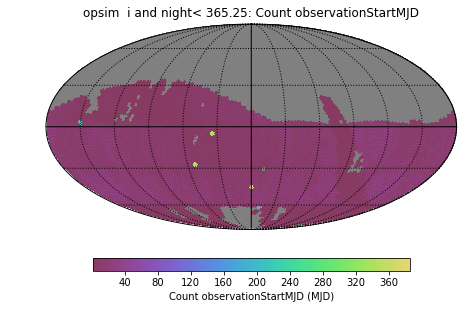

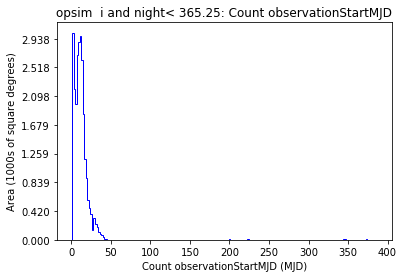

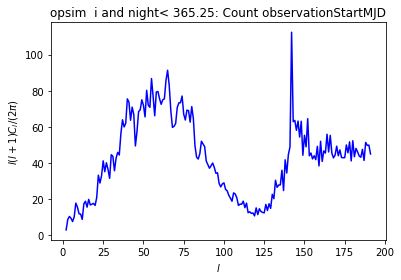

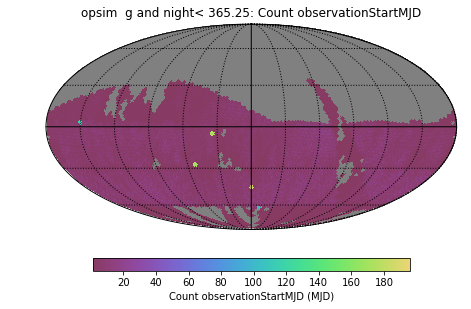

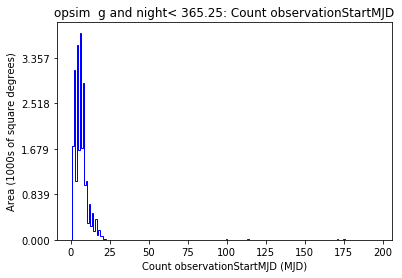

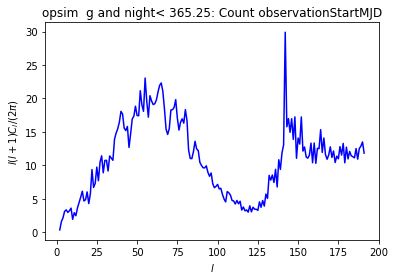

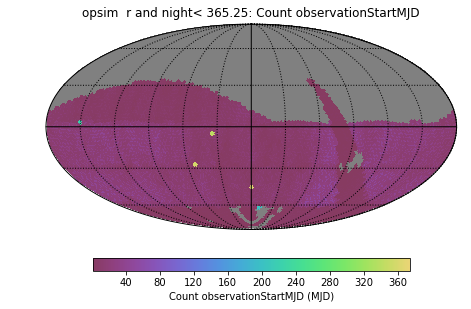

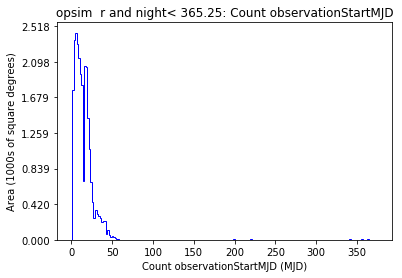

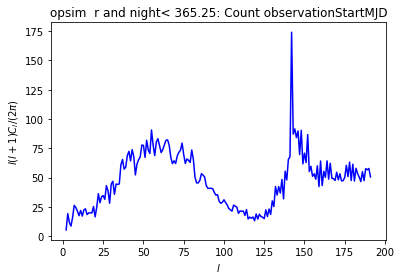

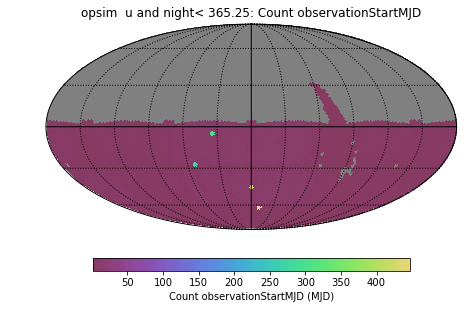

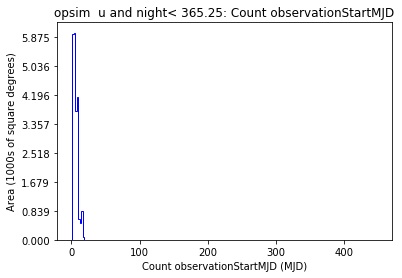

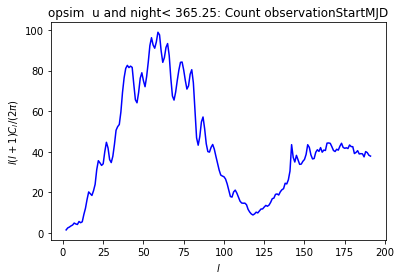

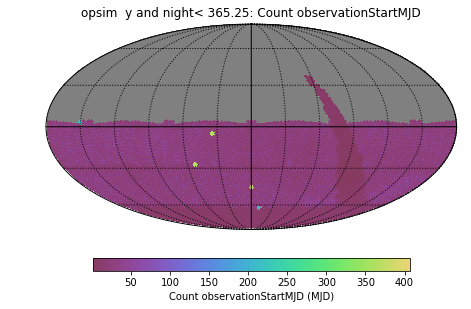

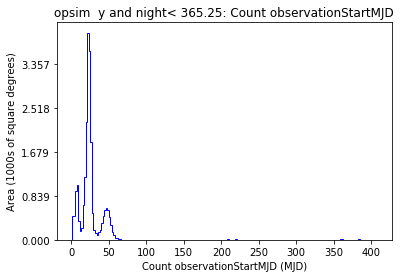

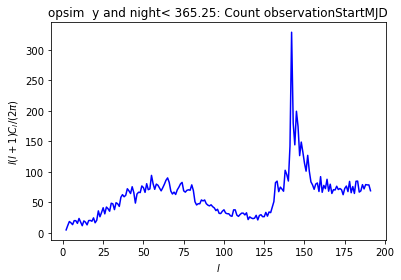

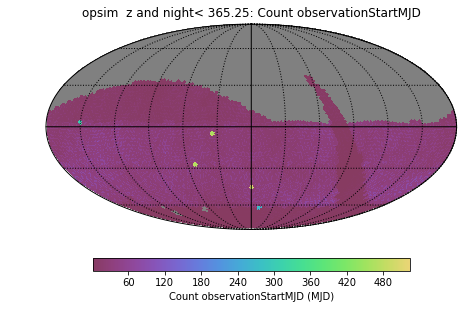

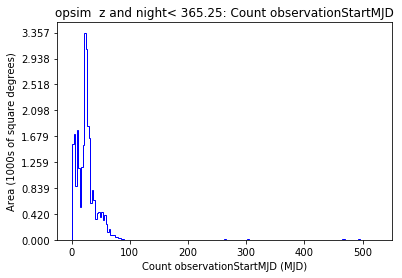

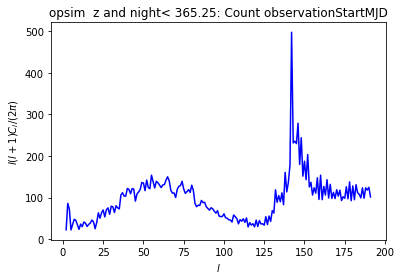

In [20]:
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [21]:
for ifilt in np.arange(Nfilt):
    
    bundlename    = all_bundlename[ifilt]

    print("===============================",filters[ifilt],"===============================")
    print(bundles[bundlename].dbCols)
    print(len(bundles[bundlename].metricValues))
    print(bundles[bundlename].metricValues[0:200])
    print(bundles[bundlename].summaryValues)
    

=============================== u ===============================
{'observationStartMJD', 'fieldRA', 'fieldDec'}
49152
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- --]
{'Min': 1.0, 'Median': 5.0, 'Max': 447.0, 'Rms': 16.027776814073285}
=============================== g ===============================
{'observationStartMJD', 'fieldRA', 'fieldDec'}
49152
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- 

In [22]:
import astroquery
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle

In [23]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object("lmc")
result_table.pprint(show_unit=True)

MAIN_ID      RA        DEC    ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
          "h:m:s"    "d:m:s"  ...                                            
-------- ---------- --------- ... -------- -------------- -------------------
NAME LMC 05 23 34.6 -69 45 22 ...        D              O 2003A&A...412...45P


In [24]:
Angle(result_table["RA"][0]+" hour")

<Angle 5.39294444 hourangle>

In [25]:
Angle(result_table["DEC"][0]+" degrees")

<Angle -69.75611111 deg>

In [26]:
SkyCoord(ra=result_table["RA"][0]+"hour",dec=result_table["DEC"][0]+ "degrees")

<SkyCoord (ICRS): (ra, dec) in deg
    (80.89416667, -69.75611111)>